In [1]:
import pandas as pd
import numpy as np
import statistics
import statsmodels
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
np.tile([[' ⬛ ',' ⬜ '],[' ⬜ ',' ⬛ ']] , (4,4))

array([[' ⬛ ', ' ⬜ ', ' ⬛ ', ' ⬜ ', ' ⬛ ', ' ⬜ ', ' ⬛ ', ' ⬜ '],
       [' ⬜ ', ' ⬛ ', ' ⬜ ', ' ⬛ ', ' ⬜ ', ' ⬛ ', ' ⬜ ', ' ⬛ '],
       [' ⬛ ', ' ⬜ ', ' ⬛ ', ' ⬜ ', ' ⬛ ', ' ⬜ ', ' ⬛ ', ' ⬜ '],
       [' ⬜ ', ' ⬛ ', ' ⬜ ', ' ⬛ ', ' ⬜ ', ' ⬛ ', ' ⬜ ', ' ⬛ '],
       [' ⬛ ', ' ⬜ ', ' ⬛ ', ' ⬜ ', ' ⬛ ', ' ⬜ ', ' ⬛ ', ' ⬜ '],
       [' ⬜ ', ' ⬛ ', ' ⬜ ', ' ⬛ ', ' ⬜ ', ' ⬛ ', ' ⬜ ', ' ⬛ '],
       [' ⬛ ', ' ⬜ ', ' ⬛ ', ' ⬜ ', ' ⬛ ', ' ⬜ ', ' ⬛ ', ' ⬜ '],
       [' ⬜ ', ' ⬛ ', ' ⬜ ', ' ⬛ ', ' ⬜ ', ' ⬛ ', ' ⬜ ', ' ⬛ ']],
      dtype='<U3')

In [3]:
titanic = pd.read_csv('titanic.csv')

In [4]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<AxesSubplot:xlabel='survived', ylabel='count'>

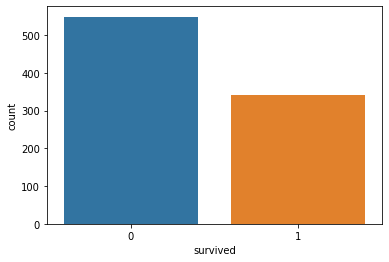

In [5]:
#EDA

sns.countplot(x='survived',data = titanic)

<AxesSubplot:xlabel='survived', ylabel='count'>

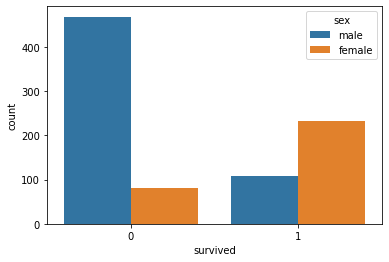

In [6]:
sns.countplot(x = 'survived',hue='sex',data=titanic)

In [7]:
#EDA Report in HTML format
from pandas_profiling import ProfileReport

tips = sns.load_dataset('tips')

profile = ProfileReport(tips, explorative=True)

profile.to_file("Output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
print(titanic.isnull().any().sum())

titanic.dropna(inplace=True)

4


In [9]:
titanic.shape[0]

182

In [10]:
#Preprocessing

sex = pd.get_dummies(titanic['sex'],drop_first=True)
sex[:5]

,male
1,0
3,0
6,1
10,0
11,0


In [11]:
embark = pd.get_dummies(titanic['embarked'],drop_first=True)
embark[:5]

,Q,S
1,0,0
3,0,1
6,0,1
10,0,1
11,0,1


In [12]:
cl = pd.get_dummies(titanic['pclass'],drop_first=True)
cl[:5]

,2,3
1,0,0
3,0,0
6,0,0
10,0,1
11,0,0


In [13]:
titanic = pd.concat([titanic,sex,cl,embark],axis=1)

In [14]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,male,2,3,Q,S
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0,0,0,0,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0,0,0,0,1
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,1,0,0,0,1
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False,0,0,1,0,1
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True,0,0,0,0,1


In [15]:
titanic.columns

Index([   'survived',      'pclass',         'sex',         'age',
             'sibsp',       'parch',        'fare',    'embarked',
             'class',         'who',  'adult_male',        'deck',
       'embark_town',       'alive',       'alone',        'male',
                   2,             3,           'Q',           'S'],
      dtype='object')

In [16]:

titanic.drop(['pclass','sex','embarked','class','who','adult_male','deck','embark_town','alive','alone'],axis=1,inplace=True)

In [17]:
titanic.head()

,survived,age,sibsp,parch,fare,male,2,3,Q,S
1,1,38.0,1,0,71.2833,0,0,0,0,0
3,1,35.0,1,0,53.1000,0,0,0,0,1
6,0,54.0,0,0,51.8625,1,0,0,0,1
10,1,4.0,1,1,16.7000,0,0,1,0,1
11,1,58.0,0,0,26.5500,0,0,0,0,1


In [18]:
X = titanic.drop(labels=['survived'],axis=1)
y = titanic['survived']

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train , X_test, y_train, y_test = train_test_split(X,y, test_size=0.27,random_state=101)

In [20]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

c:\python39\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
pred = lr.predict(X_test)

c:\python39\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


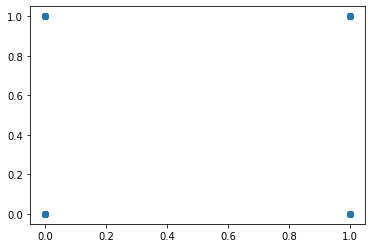

In [22]:
plt.scatter(y_test,pred)

In [23]:
pred[:5]

array([1, 0, 0, 1, 0], dtype=int64)

In [24]:
from sklearn.metrics import classification_report

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.64      0.56      0.60        16
           1       0.81      0.85      0.83        34

    accuracy                           0.76        50
   macro avg       0.72      0.71      0.71        50
weighted avg       0.75      0.76      0.76        50



In [25]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,pred)

0.76